<a href="https://colab.research.google.com/github/devreborges/Estudos-em-Python/blob/main/Limpeza%2C_tratamento_e_an%C3%A1lise_explorat%C3%B3ria_de_dados_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case de dados da consultoria

A empresa deseja fazer um investimento para aumentar as vendas e solicitou os meus serviços para análise e tratamento dos dados com objetivo de repassar as informações para o time de marketing buscando maximizar as vendas.

# Carregando e tratando os dados



In [176]:
import pandas as pd

In [177]:
xl_file = pd.ExcelFile('case_dados.xlsx')
dfs = {sheet_name: xl_file.parse(sheet_name) for sheet_name in xl_file.sheet_names}
df_combined = pd.concat(dfs.values(), ignore_index=True)
df_grouped = df_combined.groupby('LEAD_ID').agg('sum').reset_index()
df_grouped.head()

<ipython-input-177-06d4d6cf8a6a>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df_combined.groupby('LEAD_ID').agg('sum').reset_index()


,LEAD_ID,VENDIDO,ORIGEM,SUB-ORIGEM,MERCADO,LOCAL,PORTE,OBJETIVO
0,10565887,NÃO,Orgânico,0,0,Goiânia - GO,0,Consultoria
1,10565957,NÃO,Google,google - cpc,0,Belém - PA,0,Consultoria
2,10566142,NÃO,Google,google - cpc,0,Cariacica - ES,51-300,Abertura/Expansão
3,10566317,NÃO,Google,google - cpc,0,São Paulo - SP,1-10,Abertura/Expansão
4,10566399,NÃO,Google,google - cpc,0,Parauapebas - PA,0,Outro


Checando se existem valores nulos no dataframe

In [178]:
# Inicializar um dicionário para armazenar os resultados
null_value_counts = {}

# Iterar sobre as colunas do DataFrame df_grouped
for column in df_grouped.columns:
    # Calcular a contagem de valores nulos para a coluna atual
    null_counts = df_grouped[column].isnull().value_counts()
    # Adicionar os resultados ao dicionário
    null_value_counts[column] = null_counts

# Criar um DataFrame a partir do dicionário de contagens de valores nulos
null_counts_df = pd.DataFrame(null_value_counts)

# Exibir o DataFrame resultante
print(null_counts_df)


       LEAD_ID  VENDIDO  ORIGEM  SUB-ORIGEM  MERCADO  LOCAL  PORTE  OBJETIVO
False     2271     2271    2271        2271     2271   2271   2271      2271


Tratando valores duplicados ou vazios

In [179]:
df_grouped.duplicated().value_counts()

False    2271
dtype: int64

In [180]:
df_grouped['VENDIDO'].value_counts()

NÃO       2199
SIM         70
SIMSIM       2
Name: VENDIDO, dtype: int64

In [181]:
if 'SIMSIM' in df_grouped['VENDIDO'].values:
    df_grouped.loc[df_grouped['VENDIDO'] == 'SIMSIM', 'VENDIDO'] = 'SIM'
df_grouped['VENDIDO'].value_counts()

NÃO    2199
SIM      72
Name: VENDIDO, dtype: int64

In [182]:
df_grouped['ORIGEM'].value_counts()

Google               796
Orgânico             706
Facebook             279
Prospecção Ativa     188
Bing                  78
Instagram             59
Youtube               56
Leads                 35
email                 27
rep                   24
Linkedin              15
Inbound Marketing      4
Indicação              2
GoogleGoogle           1
OrgânicoOrgânico       1
Name: ORIGEM, dtype: int64

In [183]:
if 'GoogleGoogle' in df_grouped['ORIGEM'].values:
    df_grouped.loc[df_grouped['ORIGEM'] == 'GoogleGoogle', 'ORIGEM'] = 'Google'

if 'OrgânicoOrgânico' in df_grouped['ORIGEM'].values:
    df_grouped.loc[df_grouped['ORIGEM'] == 'OrgânicoOrgânico', 'ORIGEM'] = 'Orgânico'

df_grouped['ORIGEM'].value_counts()

Google               797
Orgânico             707
Facebook             279
Prospecção Ativa     188
Bing                  78
Instagram             59
Youtube               56
Leads                 35
email                 27
rep                   24
Linkedin              15
Inbound Marketing      4
Indicação              2
Name: ORIGEM, dtype: int64

In [184]:
df_grouped['SUB-ORIGEM'].value_counts()

0                           807
google - cpc                762
facebook - cpc              277
Sales Navigator             148
bing - cpc                   81
instagram - social           59
youtube - cpc                51
leads - email                34
rep - ximena-cubillos        16
linkedin - cpc               13
rep - juliana-gomes           7
email - economapas            7
youtube - social              4
linkedin - social             2
Orgânico                      1
google - cpcgoogle - cpc      1
rep - elzir-souza             1
Name: SUB-ORIGEM, dtype: int64

In [185]:
# Codificar as colunas categóricas 'ORIGEM' e 'SUB-ORIGEM'
df_grouped['ORIGEM_encoded'], _ = pd.factorize(df_grouped['ORIGEM'])
df_grouped['SUB-ORIGEM_encoded'], _ = pd.factorize(df_grouped['SUB-ORIGEM'])

# Calcular a correlação entre as colunas codificadas
correlation = df_grouped['ORIGEM_encoded'].corr(df_grouped['SUB-ORIGEM_encoded'])

# Exibir a correlação
print("Correlação entre ORIGEM e SUB-ORIGEM:", correlation)

Correlação entre ORIGEM e SUB-ORIGEM: 0.919277232191641


In [186]:
display(df_grouped[['ORIGEM','SUB-ORIGEM']])

,ORIGEM,SUB-ORIGEM
0,Orgânico,0
1,Google,google - cpc
2,Google,google - cpc
3,Google,google - cpc
4,Google,google - cpc
...,...,...
2266,Orgânico,0
2267,Google,google - cpc
2268,Orgânico,0
2269,Google,google - cpc


In [187]:
origem_zero = df_grouped[df_grouped['SUB-ORIGEM'] == 0]
origem_zero['ORIGEM'].value_counts()

Orgânico             705
Prospecção Ativa      40
Google                33
email                 20
Inbound Marketing      4
Indicação              2
Facebook               1
Youtube                1
Leads                  1
Name: ORIGEM, dtype: int64

In [188]:
teste = df_grouped[df_grouped['ORIGEM'] == 'Inbound Marketing']
teste['SUB-ORIGEM'].value_counts()

0    4
Name: SUB-ORIGEM, dtype: int64

In [189]:
# Criando uma cópia para não alterar o dataframe original.
df_tratamento = df_grouped.copy()

# Substituir os valores zero na coluna 'SUB-ORIGEM' pelas condições específicas
df_tratamento.loc[(df_tratamento['SUB-ORIGEM'] == 0) & (df_tratamento['ORIGEM'] == 'Google'), 'SUB-ORIGEM'] = 'google - cpc'
df_tratamento.loc[(df_tratamento['SUB-ORIGEM'] == 0) & (df_tratamento['ORIGEM'] == 'Orgânico'), 'SUB-ORIGEM'] = 'Orgânico'
df_tratamento.loc[(df_tratamento['SUB-ORIGEM'] == 0) & (df_tratamento['ORIGEM'] == 'email'), 'SUB-ORIGEM'] = 'email'
df_tratamento.loc[(df_tratamento['SUB-ORIGEM'] == 0) & (df_tratamento['ORIGEM'] == 'Prospecção Ativa'), 'SUB-ORIGEM'] = 'Sales Navigator'
df_tratamento.loc[(df_tratamento['SUB-ORIGEM'] == 0) & (df_tratamento['ORIGEM'] == 'Indicação'), 'SUB-ORIGEM'] = 'Indicação'
df_tratamento.loc[(df_tratamento['SUB-ORIGEM'] == 0) & (df_tratamento['ORIGEM'] == 'Inbound Marketing'), 'SUB-ORIGEM'] = 'Inbound Marketing'
df_tratamento.loc[(df_tratamento['SUB-ORIGEM'] == 0) & (df_tratamento['ORIGEM'] == 'Facebook'), 'SUB-ORIGEM'] = 'Facebook'
df_tratamento.loc[(df_tratamento['SUB-ORIGEM'] == 0) & (df_tratamento['ORIGEM'] == 'Youtube'), 'SUB-ORIGEM'] = 'Youtube'
df_tratamento.loc[(df_tratamento['SUB-ORIGEM'] == 0) & (df_tratamento['ORIGEM'] == 'Leads'), 'SUB-ORIGEM'] = 'Leads'

df_tratamento['SUB-ORIGEM'].value_counts()

google - cpc                795
Orgânico                    706
facebook - cpc              277
Sales Navigator             188
bing - cpc                   81
instagram - social           59
youtube - cpc                51
leads - email                34
email                        20
rep - ximena-cubillos        16
linkedin - cpc               13
rep - juliana-gomes           7
email - economapas            7
Inbound Marketing             4
youtube - social              4
linkedin - social             2
Indicação                     2
google - cpcgoogle - cpc      1
Facebook                      1
Youtube                       1
Leads                         1
rep - elzir-souza             1
Name: SUB-ORIGEM, dtype: int64

In [190]:
df_tratamento['LOCAL'].value_counts()

São Paulo - SP             268
-                          261
Rio de Janeiro - RJ        129
Brasília - DF               68
Belo Horizonte - MG         54
                          ... 
Birigui - SP                 1
Porto Nacional - TO          1
Conceicao do Coite - BA      1
Três Corações - MG           1
Tome-Acu - PA                1
Name: LOCAL, Length: 526, dtype: int64

In [191]:
df_tratamento[df_tratamento['LOCAL'] == '-']

,LEAD_ID,VENDIDO,ORIGEM,SUB-ORIGEM,MERCADO,LOCAL,PORTE,OBJETIVO,ORIGEM_encoded,SUB-ORIGEM_encoded
28,10588433,NÃO,Orgânico,Orgânico,Varejo,-,1-10,Planejamento estratégico,0,0
53,10598070,SIM,Orgânico,Orgânico,Varejo,-,301-1000,Planejamento estratégico,0,0
66,10612933,NÃO,Orgânico,Orgânico,Varejo,-,1-10,0,0,0
101,10626499,NÃO,Orgânico,Orgânico,Industria,-,11-50,Planejamento estratégico,0,0
103,10626886,NÃO,Orgânico,Orgânico,0,-,1-10,Geração de leads b2b,0,0
...,...,...,...,...,...,...,...,...,...,...
2236,12013225,NÃO,Prospecção Ativa,Sales Navigator,Imobiliaria/Incorporadora/Construtora,-,0,0,9,9
2237,12013244,NÃO,Prospecção Ativa,Sales Navigator,Servicos,-,0,0,9,9
2238,12013259,NÃO,Prospecção Ativa,Sales Navigator,Industria,-,0,0,9,9
2239,12013280,NÃO,Prospecção Ativa,Sales Navigator,Industria,-,0,0,9,9


In [192]:
df_tratamento[(df_tratamento['LOCAL'] == '-') & (df_tratamento['VENDIDO'] == 'SIM')]

,LEAD_ID,VENDIDO,ORIGEM,SUB-ORIGEM,MERCADO,LOCAL,PORTE,OBJETIVO,ORIGEM_encoded,SUB-ORIGEM_encoded
53,10598070,SIM,Orgânico,Orgânico,Varejo,-,301-1000,Planejamento estratégico,0,0
415,10863129,SIM,Indicação,Indicação,Marketing/Publicidade/Consultoria,-,1-10,Planejamento estratégico,4,0
460,10887561,SIM,Orgânico,Orgânico,Tecnologia,-,1-10,0,0,0
494,10911396,SIM,Orgânico,Orgânico,Servicos,-,1-10,Abertura/Expansão,0,0
848,11266644,SIM,Orgânico,Orgânico,Servicos,-,1-10,Planejamento estratégico,0,0


In [193]:
df_tratamento.loc[(df_tratamento['LOCAL'] == '-') & (df_tratamento['ORIGEM'] == 'Orgânico'), 'LOCAL'] = 'São Paulo - SP'
df_tratamento['LOCAL'].value_counts()

São Paulo - SP             312
-                          217
Rio de Janeiro - RJ        129
Brasília - DF               68
Belo Horizonte - MG         54
                          ... 
Birigui - SP                 1
Porto Nacional - TO          1
Conceicao do Coite - BA      1
Três Corações - MG           1
Tome-Acu - PA                1
Name: LOCAL, Length: 526, dtype: int64

In [194]:
df_tratamento = df_tratamento[df_tratamento['LOCAL'] != '-']
df_tratamento[df_tratamento['LOCAL'] == '-']

,LEAD_ID,VENDIDO,ORIGEM,SUB-ORIGEM,MERCADO,LOCAL,PORTE,OBJETIVO,ORIGEM_encoded,SUB-ORIGEM_encoded


Para facilitar a análise regional, adicionei uma coluna ESTADO para representar o estado de cada unicípio no dataframe

In [195]:
df_tratamento['ESTADO'] = df_tratamento['LOCAL'].str[-2:]
df_tratamento.head()


<ipython-input-195-ed902cbd1f95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tratamento['ESTADO'] = df_tratamento['LOCAL'].str[-2:]


,LEAD_ID,VENDIDO,ORIGEM,SUB-ORIGEM,MERCADO,LOCAL,PORTE,OBJETIVO,ORIGEM_encoded,SUB-ORIGEM_encoded,ESTADO
0,10565887,NÃO,Orgânico,Orgânico,0,Goiânia - GO,0,Consultoria,0,0,GO
1,10565957,NÃO,Google,google - cpc,0,Belém - PA,0,Consultoria,1,1,PA
2,10566142,NÃO,Google,google - cpc,0,Cariacica - ES,51-300,Abertura/Expansão,1,1,ES
3,10566317,NÃO,Google,google - cpc,0,São Paulo - SP,1-10,Abertura/Expansão,1,1,SP
4,10566399,NÃO,Google,google - cpc,0,Parauapebas - PA,0,Outro,1,1,PA


In [196]:
df_tratamento['ESTADO'].value_counts()

SP    639
RJ    247
MG    190
PR    121
SC    118
RS    102
BA     84
CE     70
DF     68
PE     54
GO     47
PA     43
MT     32
MA     32
RN     27
PB     25
ES     24
MS     21
SE     20
AM     17
PI     16
TO     13
AL     12
lo     10
RO      7
AC      4
AP      3
ro      2
is      2
pe      1
WY      1
il      1
Pr      1
Name: ESTADO, dtype: int64

In [197]:
valores_desconhecidos = ['lo', 'ro', 'is', 'pe', 'WY', 'il', 'Pr',]
df_tratamento[df_tratamento['ESTADO'].isin(valores_desconhecidos)]

,LEAD_ID,VENDIDO,ORIGEM,SUB-ORIGEM,MERCADO,LOCAL,PORTE,OBJETIVO,ORIGEM_encoded,SUB-ORIGEM_encoded,ESTADO
111,10638310,NÃO,Orgânico,Orgânico,Varejo,"Cheyenne, WY",+ 1000,Abertura/Expansão,0,0,WY
701,11047468,NÃO,Inbound Marketing,Inbound Marketing,Imobiliaria/Incorporadora/Construtora,Sergipe,301-1000,Abertura/Expansão,8,0,pe
728,11067899,SIM,Inbound Marketing,Inbound Marketing,Servicos,São Paulo,301-1000,Planejamento estratégico,8,0,lo
1236,11423451,NÃO,Orgânico,Orgânico,Marketing/Publicidade/Consultoria,São Paulo,1-10,Planejamento estratégico,0,0,lo
1322,11489953,NÃO,Google,google - cpc,Tecnologia,São Paulo,1-10,Planejamento estratégico,1,0,lo
1487,11564721,NÃO,Orgânico,Orgânico,Industria,"Paraná, Brasil",51-300,Ações de marketing/vendas,0,0,il
1701,11644925,NÃO,Google,google - cpc,Servicos,Rio de Janeiro,1-10,Consultoria,1,0,ro
1873,11741144,NÃO,email,email,Servicos,São Paulo,1-10,Abertura/Expansão,5,0,lo
1954,11817113,NÃO,email,email,Servicos,São Paulo,+ 1000,Planejamento estratégico,5,0,lo
2050,11865530,NÃO,email,email,Industria,São Paulo,11-50,Geração de leads b2b,5,0,lo


In [198]:
linhas_para_tratar_estado = df_tratamento[df_tratamento['ESTADO'].isin(valores_desconhecidos)].index


In [199]:
df_tratamento.loc[(df_tratamento['LOCAL'] == 'Sergipe'), 'ESTADO'] = 'SE'
df_tratamento.loc[(df_tratamento['LOCAL'] == 'São Paulo'), 'ESTADO'] = 'SP'
df_tratamento.loc[(df_tratamento['LOCAL'] == 'Paraná, Brasil'), 'ESTADO'] = 'PR'
df_tratamento.loc[(df_tratamento['LOCAL'] == 'Rio de Janeiro'), 'ESTADO'] = 'RJ'
df_tratamento.loc[(df_tratamento['LOCAL'] == 'Minas Gerais'), 'ESTADO'] = 'MG'
df_tratamento.loc[(df_tratamento['LOCAL'] == 'Pr'), 'ESTADO'] = 'PR'
df_tratamento.loc[(df_tratamento['LOCAL'] == 'Belo Horizonte, Minas Gerais'), 'ESTADO'] = 'MG'


df_tratamento['ESTADO'].value_counts()


SP    649
RJ    249
MG    192
PR    123
SC    118
RS    102
BA     84
CE     70
DF     68
PE     54
GO     47
PA     43
MA     32
MT     32
RN     27
PB     25
ES     24
MS     21
SE     21
AM     17
PI     16
TO     13
AL     12
RO      7
AC      4
AP      3
WY      1
Name: ESTADO, dtype: int64

In [200]:
df_tratamento = df_tratamento[df_tratamento['ESTADO'] != 'WY']
df_tratamento['ESTADO'].value_counts()

SP    649
RJ    249
MG    192
PR    123
SC    118
RS    102
BA     84
CE     70
DF     68
PE     54
GO     47
PA     43
MA     32
MT     32
RN     27
PB     25
ES     24
MS     21
SE     21
AM     17
PI     16
TO     13
AL     12
RO      7
AC      4
AP      3
Name: ESTADO, dtype: int64

# Gerando gráficos para compreender a efetivação regional das vendas




In [201]:
vendas_efetivadas = df_tratamento.query('VENDIDO == "SIM"')

In [202]:
vendas_por_estado = vendas_efetivadas['ESTADO']

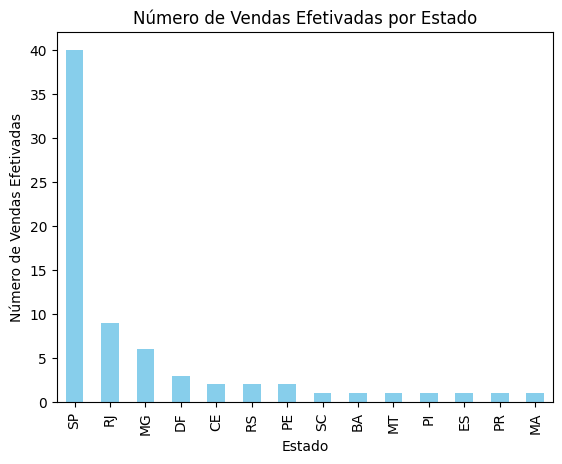

In [203]:
import matplotlib.pyplot as plt

# Contando o número de ocorrências de cada estado
contagem_estados = vendas_efetivadas['ESTADO'].value_counts()

# Plotando o gráfico de barras
contagem_estados.plot(kind='bar', color='skyblue')

# Adicionando rótulos e título
plt.xlabel('Estado')
plt.ylabel('Número de Vendas Efetivadas')
plt.title('Número de Vendas Efetivadas por Estado')

# Exibindo o gráfico
plt.show()


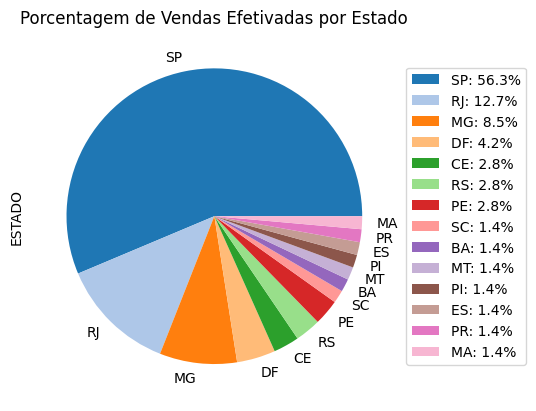

In [204]:
# Calculando as porcentagens
porcentagens = (contagem_estados / contagem_estados.sum()) * 100

# Plotando o gráfico de pizza
cores = plt.cm.tab20.colors
porcentagens.plot(kind='pie', autopct='', colors=cores)

# Adicionando título
plt.title('Porcentagem de Vendas Efetivadas por Estado')

# Adicionando a legenda com as porcentagens
plt.legend(labels=porcentagens.index.map(lambda x: f'{x}: {porcentagens[x]:.1f}%'), loc='center left', bbox_to_anchor=(1, 0.5))

# Exibindo o gráfico
plt.show()

In [205]:
# Calculando a contagem total de vendas por estado
total_vendas_por_estado = df_tratamento['ESTADO'].value_counts()

# Calculando a efetividade das vendas por estado
contagem_efetividade_das_vendas = (contagem_estados / total_vendas_por_estado) * 100


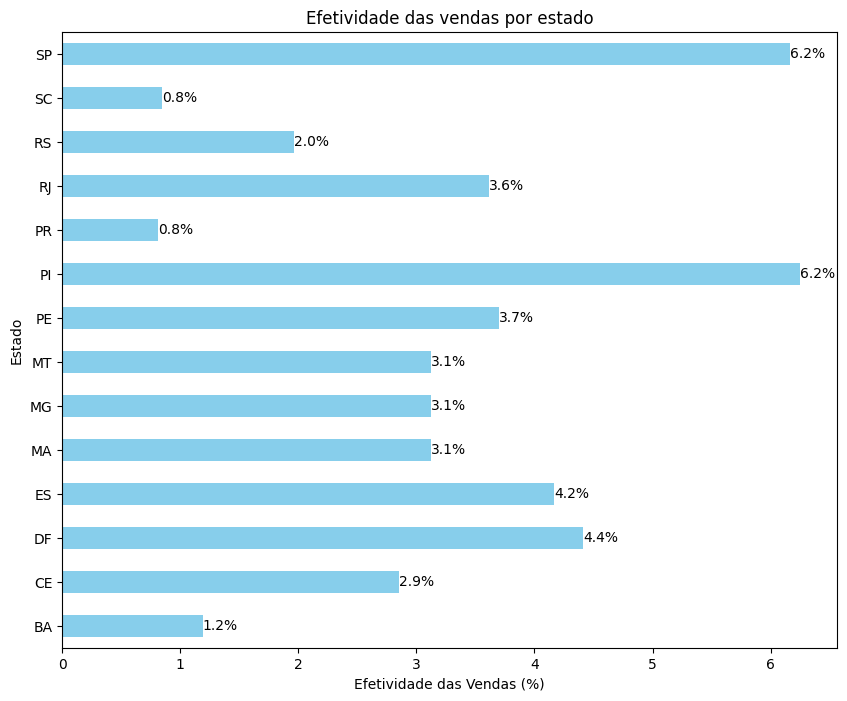

In [206]:
# Definindo o tamanho da figura
plt.figure(figsize=(10, 8))

# Removendo os valores NaN
contagem_efetividade_das_vendas = contagem_efetividade_das_vendas.dropna()

# Plotando o gráfico de barras horizontais
barras = contagem_efetividade_das_vendas.plot(kind='barh', color='skyblue')

# Adicionando título e rótulos dos eixos
plt.title('Efetividade das vendas por estado')
plt.xlabel('Efetividade das Vendas (%)')
plt.ylabel('Estado')

# Adicionando os valores de porcentagem nas barras
for i, barra in enumerate(barras.patches):
    plt.text(barra.get_width(), barra.get_y() + barra.get_height()/2, f'{contagem_efetividade_das_vendas.iloc[i]:.1f}%', ha='left', va='center')

# Exibindo o gráfico
plt.show()

São Paulo, Rio de Janeiro, Minas Gerais e o Distrito federal contemplam 81,7% das vendas realiadas no período.

# Gerando gráficos sobre a origem das vendas

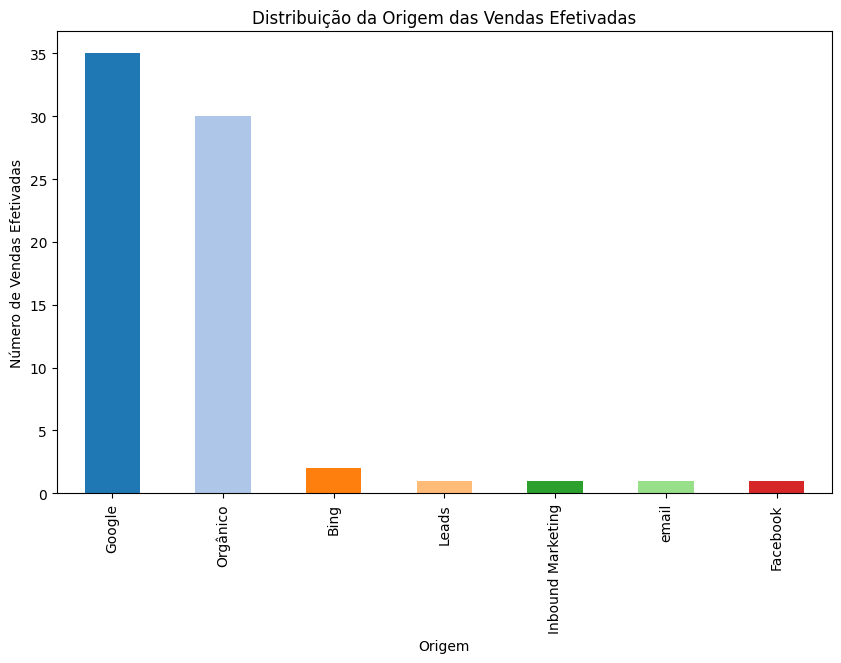

In [208]:
# Definindo o tamanho da figura
plt.figure(figsize=(10, 6))

# Plotando o gráfico de barras empilhadas
origem_das_vendas_efetivadas.plot(kind='bar', stacked=True, color=plt.cm.tab20.colors)

# Adicionando título e rótulos dos eixos
plt.title('Distribuição da Origem das Vendas Efetivadas')
plt.xlabel('Origem')
plt.ylabel('Número de Vendas Efetivadas')

# Exibindo o gráfico
plt.show()

In [213]:
# Calculando a contagem de ocorrências de cada origem
contagem_origem = df_tratamento['ORIGEM'].value_counts()

# Filtrando as origens que ocorrem mais de 10 vezes
origens_mais_de_20_ocorrencias = contagem_origem[contagem_origem > 20 ].index

# Calculando a efetividade das vendas por origem
efetividade_das_vendas_origem = (origem_das_vendas_efetivadas / contagem_origem.loc[origens_mais_de_20_ocorrencias]) * 100


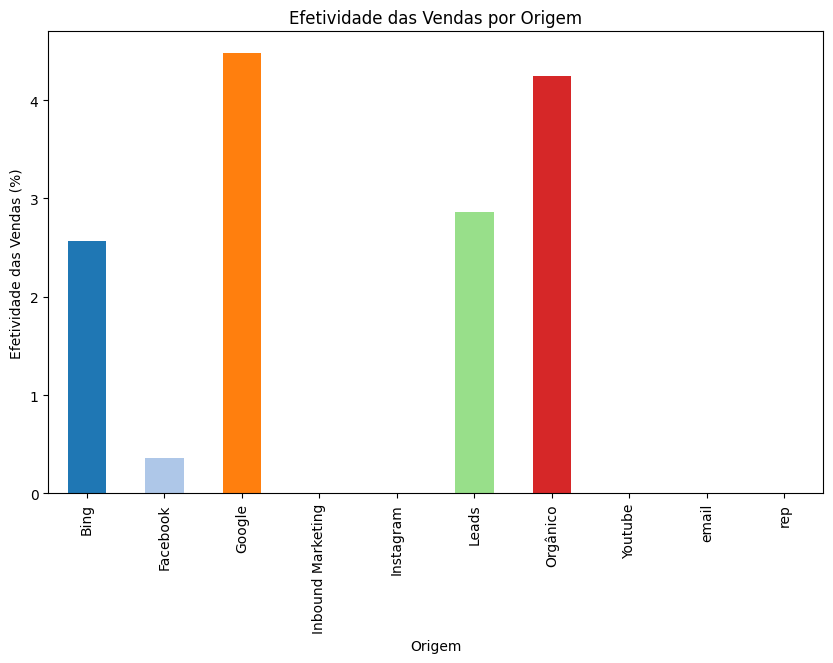

In [214]:
# Definindo o tamanho da figura
plt.figure(figsize=(10, 6))

# Plotando o gráfico de barras agrupadas
efetividade_das_vendas_origem.plot(kind='bar', color=plt.cm.tab20.colors)

# Adicionando título e rótulos dos eixos
plt.title('Efetividade das Vendas por Origem')
plt.xlabel('Origem')
plt.ylabel('Efetividade das Vendas (%)')

# Exibindo o gráfico
plt.show()

Para considerar a efetividade das vendas, não podemos considerar quantidades com baixo espaço amostral(nessecaso considerei valores maiores que 20); Isso porque quanto maior o espaço amostral, maior é confiabilidade dos dados fornecidos.





# Insights

**1º Insight** - Como a empresa está localizada em São Paulo, é compreensível que o estado venha a bandeirar em 1º lugar com as vendas efetivadas, sendo sua ampla maioria de origem orgânica. Considerando esse cenário, seguem as sugestões com base nos dados para o time de marketing.

**1** - Campanhas de Marketing de Conteúdo Localizado: Desenvolver conteúdo específico para o público-alvo em São Paulo pode ser uma estratégia eficaz. Isso pode incluir a criação de blogs, artigos ou vídeos que abordem tópicos relevantes para os consumidores locais, eventos na região, ou mesmo curiosidades sobre São Paulo.

**2** - Parcerias com Influenciadores Locais: Parcerias com influenciadores digitais locais que tenham uma base de seguidores em São Paulo podem ajudar a aumentar a visibilidade da marca na região. Esses influenciadores podem promover os produtos ou serviços da empresa para seu público-alvo local, ajudando a impulsionar as vendas.


**3**Eventos Locais e Ativações de Marca: Participar de eventos locais ou realizar ativações de marca em São Paulo pode ajudar a fortalecer a presença da empresa na região e a se conectar diretamente com os consumidores locais. Isso pode incluir a participação em feiras ou eventos da indústria, patrocínio de eventos locais ou até mesmo a organização de eventos próprios da marca.



**2º Insight** - O google e os mecanismos de pesquisa, juntas detém  a maior parte das vendas efetivadas e se mostram eficientes. Considerando a eficiência desses mecanismos, seguem as sugestões para otimização das vendas com base nos dados.

**1** - Investimento Contínuo em Otimização de Motores de Busca (SEO): Dado o sucesso do Google e outros mecanismos de pesquisa, é essencial continuar investindo em estratégias de SEO para garantir uma presença forte nos resultados de pesquisa orgânica. Isso pode incluir a otimização de palavras-chave relevantes, a melhoria da experiência do usuário no site e a criação de conteúdo de alta qualidade.

**2** - Campanhas de Anúncios Pagos (SEM): Além do SEO, considerar investir em campanhas de anúncios pagos nos mecanismos de pesquisa, como Google Ads. Essas campanhas podem ajudar a garantir visibilidade imediata nos resultados de pesquisa e direcionar o tráfego relevante para o site da empresa.